In [16]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [17]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

Found 8593 images belonging to 2 classes.
Found 948 images belonging to 2 classes.


In [18]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [19]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [20]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 56, 56, 256)      

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=5,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
10/10 [==============================] - 237s 24s/step - loss: 1827.9532 - accuracy: 0.5025 - val_loss: 0.6864 - val_accuracy: 0.5625
Epoch 2/100
10/10 [==============================] - 232s 24s/step - loss: 0.8799 - accuracy: 0.5313 - val_loss: 0.7407 - val_accuracy: 0.4938
Epoch 3/100
10/10 [==============================] - 222s 23s/step - loss: 0.7264 - accuracy: 0.4703 - val_loss: 0.6911 - val_accuracy: 0.5938
Epoch 4/100
10/10 [==============================] - 225s 23s/step - loss: 0.6952 - accuracy: 0.4354 - val_loss: 0.6927 - val_accuracy: 0.5188
Epoch 5/100
10/10 [==============================] - 247s 25s/step - loss: 0.6941 - accuracy: 0.4914 - val_loss: 0.6938 - val_accuracy: 0.4688
Epoch 6/100
10/10 [==============================] - 247s 25s/step - loss: 0.6931 - accuracy: 0.5113 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 7/100
10/10 [==============================] - 292s 30s/step - loss: 0.6930 - accuracy: 0.4983 - val_loss: 0.6925 - val_accuracy: 0.5

Epoch 23/100
10/10 [==============================] - 232s 24s/step - loss: 0.6926 - accuracy: 0.5006 - val_loss: 0.6915 - val_accuracy: 0.5063
Epoch 24/100
10/10 [==============================] - 222s 22s/step - loss: 0.6940 - accuracy: 0.4820 - val_loss: 0.6933 - val_accuracy: 0.4437
Epoch 25/100
10/10 [==============================] - 222s 22s/step - loss: 0.6930 - accuracy: 0.5016 - val_loss: 0.6936 - val_accuracy: 0.4812
Epoch 26/100
10/10 [==============================] - 220s 22s/step - loss: 0.6942 - accuracy: 0.4777 - val_loss: 0.6937 - val_accuracy: 0.4688
Epoch 27/100
10/10 [==============================] - 218s 22s/step - loss: 0.6943 - accuracy: 0.4424 - val_loss: 0.6932 - val_accuracy: 0.4688
Epoch 28/100
10/10 [==============================] - 217s 22s/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6939 - val_accuracy: 0.4500
Epoch 29/100
10/10 [==============================] - 7495s 831s/step - loss: 0.6926 - accuracy: 0.5370 - val_loss: 0.6944 - val_accurac

10/10 [==============================] - 276s 28s/step - loss: 0.6939 - accuracy: 0.4969 - val_loss: 0.6943 - val_accuracy: 0.4875
Epoch 46/100
10/10 [==============================] - 267s 27s/step - loss: 0.7035 - accuracy: 0.4640 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 47/100
10/10 [==============================] - 253s 25s/step - loss: 0.6935 - accuracy: 0.4477 - val_loss: 0.6941 - val_accuracy: 0.4500
Epoch 48/100
10/10 [==============================] - 272s 27s/step - loss: 0.6932 - accuracy: 0.5084 - val_loss: 0.6925 - val_accuracy: 0.5500
Epoch 49/100
10/10 [==============================] - 278s 29s/step - loss: 0.6922 - accuracy: 0.5759 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 50/100
10/10 [==============================] - 289s 29s/step - loss: 0.9219 - accuracy: 0.5213 - val_loss: 0.6934 - val_accuracy: 0.5188
Epoch 51/100
10/10 [==============================] - 287s 29s/step - loss: 0.9606 - accuracy: 0.4754 - val_loss: 0.7420 - val_accuracy: 0.5375
Epoch

10/10 [==============================] - 213s 22s/step - loss: 0.9001 - accuracy: 0.4898 - val_loss: 3.3087 - val_accuracy: 0.5250
Epoch 68/100
10/10 [==============================] - 215s 22s/step - loss: 1.2948 - accuracy: 0.5475 - val_loss: 0.6986 - val_accuracy: 0.4625
Epoch 69/100
10/10 [==============================] - 216s 22s/step - loss: 0.6974 - accuracy: 0.4453 - val_loss: 0.6943 - val_accuracy: 0.4563
Epoch 70/100
10/10 [==============================] - 216s 22s/step - loss: 0.6944 - accuracy: 0.4426 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 71/100
10/10 [==============================] - 215s 22s/step - loss: 0.6941 - accuracy: 0.4715 - val_loss: 0.6934 - val_accuracy: 0.4875
Epoch 72/100
10/10 [==============================] - 216s 22s/step - loss: 0.6936 - accuracy: 0.5077 - val_loss: 0.6924 - val_accuracy: 0.5375
Epoch 73/100
10/10 [==============================] - 6472s 717s/step - loss: 0.6929 - accuracy: 0.5126 - val_loss: 0.6948 - val_accuracy: 0.4437
Epo

10/10 [==============================] - 246s 25s/step - loss: 0.6930 - accuracy: 0.5081 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 90/100
10/10 [==============================] - 244s 25s/step - loss: 0.6940 - accuracy: 0.4761 - val_loss: 0.6947 - val_accuracy: 0.4500
Epoch 91/100
10/10 [==============================] - 234s 24s/step - loss: 0.6918 - accuracy: 0.5504 - val_loss: 0.6958 - val_accuracy: 0.4375
Epoch 92/100
10/10 [==============================] - 282s 29s/step - loss: 0.6933 - accuracy: 0.5048 - val_loss: 0.6936 - val_accuracy: 0.4938
Epoch 93/100
10/10 [==============================] - 294s 30s/step - loss: 0.6954 - accuracy: 0.4469 - val_loss: 0.6928 - val_accuracy: 0.5188
Epoch 94/100
10/10 [==============================] - 292s 30s/step - loss: 0.6934 - accuracy: 0.4953 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 95/100
10/10 [==============================] - 266s 27s/step - loss: 0.6931 - accuracy: 0.5059 - val_loss: 0.6930 - val_accuracy: 0.5125
Epoch

benign


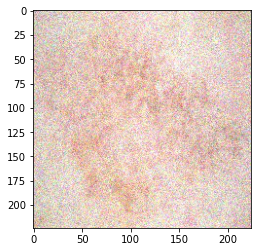

In [32]:
from keras.preprocessing import image
img = image.load_img("3.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
#saved_model = load_model("vgg16_1.h5")
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("benign")
else:
    print('malignant')